# Summary

**Purpose**: To predict the likelihood of a binary outcome.  
**Logistic Function**: Converts linear combinations of features into probabilities.  
**Decision Threshold**: A common threshold is 0.5; if the probability is higher, the predicted outcome is "yes" or 1; otherwise, it's "no" or 0.  
**Coefficients**: Indicate the influence of each feature on the probability.  

**Example**  
> In a spam detection scenario, logistic regression can predict whether an email is spam based on its features.  
> Features are like the number of links or certain words used etc.  
> If the predicted probability of being spam is above 0.5, it's classified as spam; if below, it's not spam.

**Benefits**
> 1. Interpretable: The coefficients can be understood and analyzed.  
> 2. Probabilities: Provides a measure of confidence in the predictions.  
> 3. Versatile: Can be used in many domains, such as healthcare, marketing, and finance, to predict binary outcomes.

**Limitations**
> 1. Only Binary Outcomes: Not suitable for more than two classes without modifications.  
> 2. Nonlinear Data: May require transformations or other techniques to handle complex relationships.

# 1. The Problem

We have anonymized data of 
1. About 200 users.
2. Features are:
>    - Each user's salary,
>    - her years of experience as a data scientist,
>    - and whether she paid for a premium account.

3. Predict what:
   > Whether a user paid for a premium account?  - 
   > Classification problem since output is binary class/categorical (0 or 1).

4. Obvious first attempt: use linear regression model
   > $$paid\_account = \beta_0 + \beta_1 . experience + \beta_2 * salary + \epsilon$$

In [30]:
# Our data [(Experience_yrs, Salary, Paid_for_premium),(...),(...),...]

tuples = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]
data = [list(row) for row in tuples] # Convert tuples to List of Vectors


Text(0.5, 1.0, 'Users Paid and Unpaid for premium')

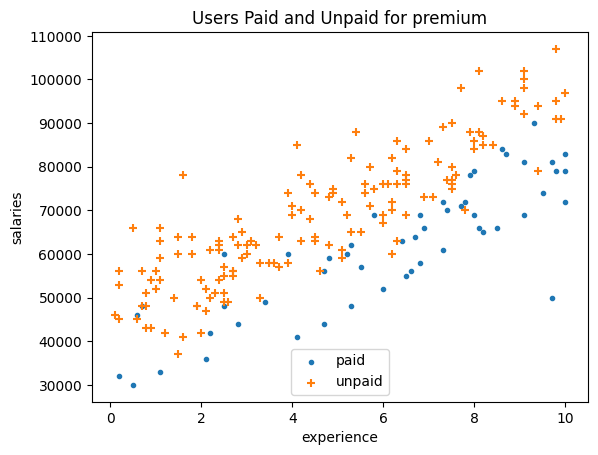

In [31]:
# Let's plot and see paid and unpaid users
from matplotlib import pyplot as plt

paid_data = [row for row in data 
             if row[2] == 1]
unpaid_data = [row for row in data 
             if row[2] == 0]
paid_data
xs_paid = [row[0] for row in paid_data]
ys_paid = [row[1] for row in paid_data]

plt.scatter(xs_paid,ys_paid, label = 'paid', marker='.')

xs_unpaid = [row[0] for row in unpaid_data]
ys_unpaid = [row[1] for row in unpaid_data]
plt.scatter(xs_unpaid,ys_unpaid, label = 'unpaid', marker= '+')
plt.legend(loc = 'lower center')
plt.xlabel('experience')
plt.ylabel('salaries')
plt.title('Users Paid and Unpaid for premium')

In [35]:
# Turn data into format: y = beta_0 + beta_1 * Experience_yrs + beta_2 * Salary
# x: Independent variables = [1, Experience_yrs, Salary]
# y: Dependent variable = [Paid_for_premium]

xs = [[1.0] + row[:2] for row in data] # beta_0 is chosen 1 by default as starting guess
ys = [row[2] for row in data] # binary

# Taking beta_0 as 1 is a common practice in linear regression, logistic regression, and other similar statistical models.

# 2. Using Linear Regression 

least squares fit: 100%|██████████████████| 1000/1000 [00:00<00:00, 1783.18it/s]


Text(0.5, 1.0, 'Using LR to predict premium account')

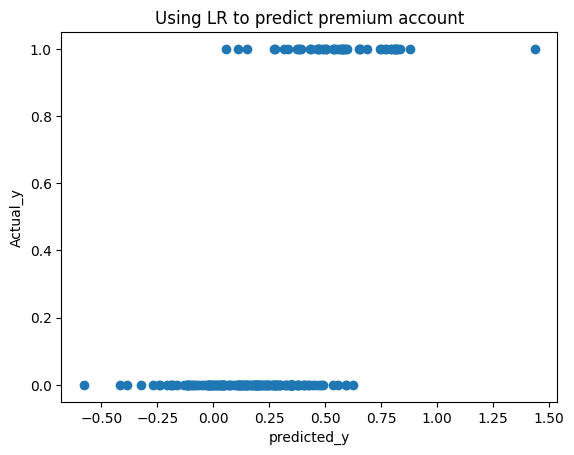

In [27]:
from matplotlib import pyplot as plt
from scratch.multiple_regression import least_squares_fit, predict
from scratch.working_with_data import rescale
from scratch.gradient_descent import gradient_step

learning_rate = 0.001
rescaled_xs = rescale(xs)

beta = least_squares_fit(rescaled_xs, ys, learning_rate, 1000, 1)
assert beta == [0.2554054269472961, 0.437404621272899, -0.4271055063462302]

# Calculate predicted y
predictions = [predict(x_i, beta) for x_i in rescaled_xs]

# Plot and see real y and predicted y
plt.scatter(predictions, ys)
plt.xlabel('predicted_y')
plt.ylabel('Actual_y')
plt.title('Using LR to predict premium account')

## Problems in Linear Regression for classification problems?

1. The predicted values are beyond 0-1. Many even negative. Whereas, what we want is either 0 or 1 or probability of it (again which is 0 to 1 and can be used to assign binary value to y)

2. Error is correlated to features.
   > - How? See, coefficient for experience is 0.43.  
   > - Means higher the experience of a person, higher rhe chnaces of premium account.   
   > - Model will output large values for people with lots of experience.  
   > - But actual value should be between 0 and 1.  
   > - Which means that necessarily very large outputs (and therefore very large values of experience) correspond to very large negative values of the error term.  
   > - Because this is the case, our estimate of beta is biased.

Instead what we want??
1. For large positive values of $(x_i \cdot \beta)$, output should be 1
2. For large negative values, output should be 0.

We will do this by using **Logistic Function**.


# 3. The Logistic Function

## (a) f(x): Logistic
\begin{equation}
Logistic(x) = f(x)= \frac{1}{(1+e^{-x})}
\tag{1}
\end{equation}
For any value of x, logistic function will vary between $0$ to $1$.
- $x=-\infty :  Logistic(x) = 0$
- $x=\infty :  Logistic(x) = 1$

Text(0.5, 0, 'x')

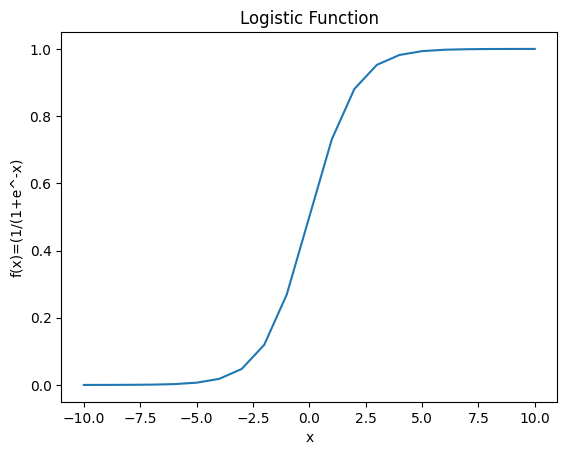

In [78]:
import math
def logistic(x: float) -> float:
    return 1.0/(1 + math.exp(-x))

#plot logistic function
x = [i for i in range(-10, 11)]
y = [logistic(i) for i in x]

from matplotlib import pyplot as plt
plt.plot(x, y)
plt.title('Logistic Function')
plt.ylabel('f(x)=(1/(1+e^-x)')
plt.xlabel('x')

## (b) Derivative of f(x): logistic_prime
Let's say,
\begin{equation}
y = Logistic(x) = \frac{1}{(1+e^{-x})}
\tag{2}
\end{equation}

\begin{equation}
y' = Logistic\_prime(x) = f'(x)= \frac{d}{dx}.\frac{1}{(1+e^{-x})}
\tag{3}
\end{equation}

\begin{equation}
= \frac{d}{dx}. (1+e^{-x})^{-1}
\end{equation}

\begin{equation}
= (-1) (1+ e^{-x})^{-2}(-e^{-x})
\end{equation}

\begin{equation}
= \frac{e^{-x}}{(1+ e^{-x})^2}
\tag{4}
\end{equation}

put (2) in (4),
\begin{equation}
y' = Logistic\_prime(x) = f'(x) = y . (1-y)
\tag{5}
\end{equation}

In [79]:
def logistic_prime(x: float) -> float:
    y = logistic(x)
    return y * (1-y)

## (c) Likelihoood Function

- **In Linear Regression**:
  > - We minimize the square error and find beta (i.e using least square fit)  
  > - This maximized the likelihood of the data
  > - For continuous numerical problem this works 
- **In Logistic Regression**:
  > - Problem is not continuous but binary
  > - We can't estimate error and minimize that to get maximized likelihood of data
  > - Thus here <u>we directly Maximize the Likelihood of our data</u>
  > - For this <u>we will minimize negative of Likelihood function</u> using gradient descent.

- In multiple regression our model was defined as:
  \begin{equation}
  y_i = \beta . x_i + \epsilon_i
  \end{equation}
- In Logistic regression our model uses logistic function and becomes:
  \begin{equation}
  y_i = f(x_i\beta)+ \epsilon_i
  \end{equation}
- Given $\beta$, each $y_i$ should equal 1 with probability $f(x_i\beta)$ and 0 with probability $1 − f(x_i\beta)$
- Therefore, PDF for $y_i$ is **Likelihood function** which is given as:
  \begin{equation}
  L = p(y_i|x_i\beta) = (f(x_i\beta))^{y_i} . (1 − f(x_i\beta))^{1-y_i}
  \tag{6}
  \end{equation}

## (d) Log Likelihood Function

- Its easy to maximize Log Likelihood Function, rather than Likelihood function
- Because Log is strictly positively increasing function, the mximum value of log will also maximize the Likelihood.

\begin{equation}
log L(\beta|x_i, y_i) = y_i log f(x_i, \beta) + (1-y_i) log(1-f(x_i, \beta))
\tag{7}
\end{equation}

- Because gradient decsent minimizes things, we will **minimize negative log likelihood** to maximize likelihood
- Thus, **negative log likelihood** is our **Loss function** for gradient descent.

In [80]:
# Negative log likelihood for one row

import math
from scratch.linear_algebra import Vector, dot

def _negative_log_likelihood(x: Vector, y: float, beta: Vector) -> float:
    """
    The negative log likelihood for one data point
    """
    if y == 1:
        return -math.log(logistic(dot(x, beta)))
    else: 
        return -math.log(1-logistic(dot(x, beta)))

# For full dataset
# x_i are independent thus likelihood will multiply
# log likelihood will add

from typing import List

def negative_log_likelihood(xs: List[Vector], ys: List[float], beta: Vector) -> float:
    return sum(_negative_log_likelihood(x, y, beta) 
               for x, y in zip(xs, ys))


## (e) Gradient of y wrt beta

- To use gradient descent we need to find gradient of y wrt to all $\beta_i$.
- So, partial differentiation of negative log likelihood  wrt to $\beta_j$ will be given as:
- From equation (7) and (5) it comes out as:
  \begin{equation}
  \frac{\partial (-log L(\beta|x_i, y_i))}{\partial\beta_j} = -(y - f(x\beta))) . x_j
  \tag{8}
  \end{equation}

- Our data is arrange like (ixj matrix):
  > $y_1$   [$x_{11}$  $x_{21}$  $x_{31}$]   
  > $y_2$   [$x_{12}$  $x_{22}$  $x_{32}$]  
  > .  
  > .  
  > .  
  > .  
  > $y_i$    [$x_{ji}$]

- for each $x_j$ we have one $\beta_j$

In [92]:
# PD wrt one coefficient for one data point (row) 
from scratch.linear_algebra import vector_sum

def _negative_log_partial_j(x: Vector, y: float, beta: Vector, j: int) -> float:
    """
    The jth partial derivative for one data point i.
    Here i is the index of the data point.
    """
    return -(y - logistic(dot(x,beta)))*x[j]

# Find gradient vector for all such beta for one data point (row)

def _negative_log_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    """
    The gradient for one data point.
    """
    return [_negative_log_partial_j(x, y, beta, j) 
            for j in range(len(beta))]

# Add all gradients for full data set

def negative_log_gradient(xs: List[Vector], ys: List[float], beta: Vector) -> Vector:
    return vector_sum([_negative_log_gradient(x, y, beta) for x, y in zip(xs, ys)])

# 4. Applying the Model

- Now we have our gradient vector for each beta_j

- We will use it in gradient descent to minimize our negative log likelihood 

- Let's first get ready our training and testing data:

In [93]:
from scratch.machine_learning import train_test_split
import random
import tqdm

random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(rescaled_xs, ys, 0.33)
assert len(xs)*0.33 == len(x_test)
learning_rate = 0.01

# set random starting point for beta
beta = [random.random() for _ in range(len(x_train[0]))]

# Do gradient descent

with tqdm.trange(10000) as t:
    for epoch in t:
        gradient = negative_log_gradient(x_train, y_train, beta)
        beta = gradient_step(beta, gradient, -learning_rate)
        loss = negative_log_likelihood(x_train, y_train, beta)
        t.set_description(f"loss: {loss:.3f} beta: {beta}")

loss: 39.963 beta: [-2.023903245184232, 4.693047846409775, -4.469811314555514]: IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

loss: 39.963 beta: [-2.0239032476251424, 4.693047853942649, -4.469811321910748]:IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

loss: 39.963 beta: [-2.0239032476251424, 4.693047853942649, -4.469811321910748]:


- This gives coefficients of rescaled data
- We can tranform them back to original data
- Rescaled data was $\frac{xs-mean}{\sigma}$

In [95]:
from scratch.working_with_data import scale

means, stdevs = scale(xs)
beta_unscaled = [(beta[0] - beta[1]*means[1]/stdevs[1] - beta[2]*means[2]/stdevs[2]),
                beta[1]/stdevs[1],
                beta[2]/stdevs[2]]
beta_unscaled

[8.927236932527311, 1.6482026277676038, -0.00028768900920142336]

- But it is not same as Linear regression interpretation.
- Here, if ${\beta}.{x_i}$ is already large i.e. near to 1, then increasing it further will not affect probability.
- Similarly, if ${\beta}.{x_i}$ is closer to 0, increasing it even a small might increase the probability a bit.
- So, here we can just say that - all else being equal - people with more experience are more likely to get paid accounts - all else being equal—people with higher salaries are less likely to pay for accounts.
- This is same as we plotted in the first graph.


# 5. Goodness of fit

- Let's predict $y_{predict}$ using training data $x_{test}$.
- And then calculate precision and recall using $y_{predict}$ and $y_{test}$
- We will consider y = 1 if $p >= 0.5$

In [103]:
true_positives = false_positives = true_negatives = false_negatives = 0

for x_i, y_i in zip(x_test, y_test):
    y_predict = logistic(dot(x_i, beta))

    if y_predict >= 0.5 and y_i == 1:
        true_positives +=1
    elif y_i == 1:
        false_negatives +=1
    elif y_predict < 0.5:
        true_negatives +=1
    else:
        false_positives +=1

precision = true_positives / (true_positives + false_positives)
recall = true_positives/(true_positives+false_negatives)

print(f"{precision = } {recall =}")

# not bad percentage considering how little data we have

precision = 0.75 recall =0.8


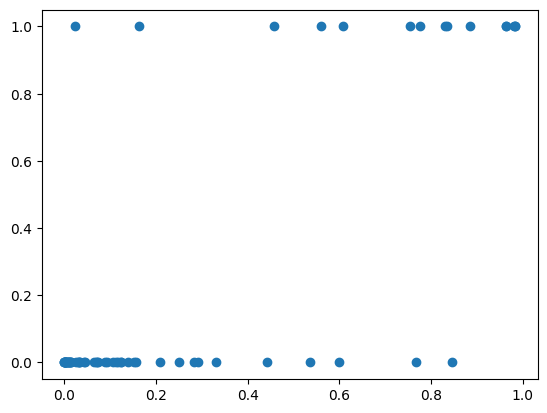

In [106]:
# Let's plot predictions vs Actual
y_predict = [logistic(dot(x_i, beta)) for x_i in x_test]
plt.scatter(y_predict, y_test)

# 6. Support Vector Machines